<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [8]:
docs = yelp.text.values.tolist()
docs[0]

'BEWARE!!! FAKE, FAKE, FAKE....We also own a small business in Los Alamitos, CA and received what looked like a legitimate bill for $70 with an account number and all.  I called the phone number listed (866) 273-7934.  The wait time on hold said 20 minutes and to leave a message.  I could not get a live person on the phone no matter what number I selected.  I left a very FIRM message that I would be contacting the BBB and my attorney regarding their company trying to scam businesses. This has to be illegal!!!!!'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [11]:
import gensim
from gensim.utils import simple_preprocess

def tokenize(doc):
    for doc in docs:
        yield(simple_preprocess(str(doc), deacc=True))

In [12]:
data_words = list(tokenize(doc))
data_words[0][:10]

['beware',
 'fake',
 'fake',
 'fake',
 'we',
 'also',
 'own',
 'small',
 'business',
 'in']

In [65]:
#trying nltk stopwords becasue spacy hasn't worked great for me
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words = remove_stopwords(data_words)

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', tokenizer=lambda doc: doc, lowercase=False)

dtm = tfidf.fit_transform(data_words)
df = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
df.head()

/Users/ljohnson/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,aa,aaa,aaaahhhs,aaasssk,aabs,aamco,aand,aaron,aback,abandoned,...,覺得店家很用心製作,誓約書にサイン,誰も乗車しなくても,豆腐花,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語て指導かあります,食へ物はうまい,餐後點了甜點
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [68]:
fake_review = ["Great food. The octopus was delicious. Next time I will try the sea cucumber!"]

In [69]:
new = tfidf.transform(fake_review)

nn.kneighbors(new.todense())

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[8852, 2466, 3810, 6018, 3802, 7181, 8294, 2471, 1242, 1012]]))

In [70]:
print(docs[8852], docs[2466], docs[3810], docs[6018],  docs[3802], docs[7181], docs[8294], docs[2471], docs[1242], docs[1012])

Sooooooooo much better than Jamba!!!  And that's saying something for me since I was coming of age when Jamba first came out on the scene and that was when people started to obsess over smoothies.  

My hubby has gone here a ton and I finally grabbed one with him the other day.  He loves the South Pacific Squeeze and so I went with that for my first time.  Strawberries.  Pineapples.  Pineapple Sherbert.  Orange Juice.  Bananas.  Mmmm mmmm good.  

All I have to say is...they are better than Jamba for the mere fact Robek's smoothies are way fruitier tasting, less icy (yet still smooth), and don't taste of yogurt.  They are way more refreshing as well.  I'm hooked!

I already went in a second time, this morning, right after yoga.  BTW....they open up at 9 am on Sundays versus their usual 6 am opening on weekdays.  

I'll be heading back soon to try other flavors for sure.  Their boosts are 25 cents extra and definitely worth it. This organization promises that their adoption fee for a pu

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

vect = TfidfVectorizer(stop_words='english', tokenizer=lambda doc: doc, lowercase=False)
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(data_words, yelp['stars'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.9min finished
/Users/ljohnson/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/Users/ljohnson/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [72]:
y_pred = grid_search.predict(fake_review)
y_pred

array([5])

Makes sense, this would be a 5 star review.

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [73]:
from gensim import corpora

id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

In [77]:
from gensim.models.ldamulticore import LdaMulticore

# build LDA model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=6, 
                         random_state=42,
                         passes=10,
                         workers=4)

In [78]:
# take a look at keywords in the 10 topics
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
print(topics)

['place time one back great food good go service get', 'place good like get one pizza back would time food', 'great place time like really good also nice friendly back', 'great place get one like always time staff service good', 'would time get back service us one said room told', 'food good place great service chicken like really ordered one']


In [59]:
pip install wordcloud

     |████████████████████████████████| 163kB 1.9MB/s 
     |████████████████████████████████| 3.9MB 3.1MB/s 
Note: you may need to restart the kernel to use updated packages.


## Decided to use word cloud visulaizations since I was having trouble with pyLDAvis.

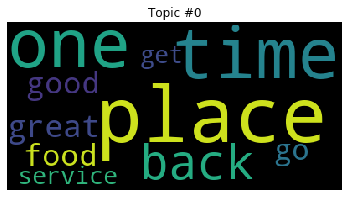

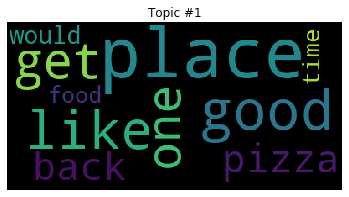

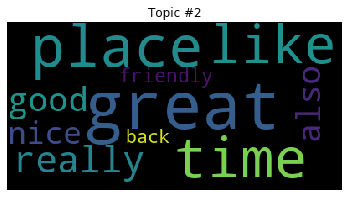

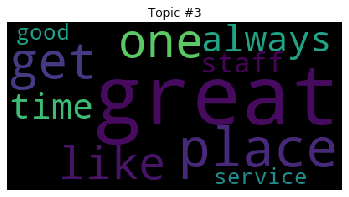

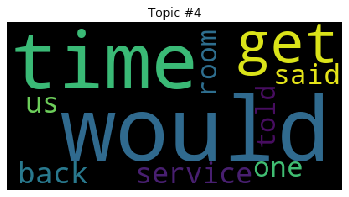

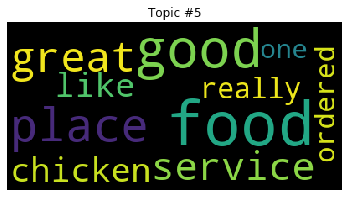

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

### With more time, I would like to go back and revise my stop words. Getting rid of words like good, great, place, food, etc would provide more interesting results.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)